<h1> Imports and reading data </h1>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm

data_features = pd.read_csv('Data/features.csv')
data_stores= pd.read_csv('Data/stores.csv')
data_train = pd.read_csv('Data/train.csv')

<h1> Exploratory Data Analysis </h1>

<h3> Stores data </h3>

In [7]:
data_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
print(data_stores.shape)
print(data_stores.info())

(45, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


In [9]:
data_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


<h3> Features data </h3>

In [10]:
data_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
print(data_features.shape)
print(data_features.info())

(8190, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [12]:
data_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


<h3> Train data </h3>

In [13]:
data_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [14]:
print(data_train.shape)
print(data_train.info())

(421570, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [15]:
data_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


<h3> Negative weekly sales values </h3>

In [16]:
negative_sales_count = (data_train['Weekly_Sales'] < 0).sum()
total_rows = len(data_train['Weekly_Sales'])
percentage_negative_sales = (negative_sales_count / total_rows) * 100


print(f"Number of negative weekly sales: {negative_sales_count}")
print(f"Percentage of negative weekly sales: {percentage_negative_sales:.2f}%")

Number of negative weekly sales: 1285
Percentage of negative weekly sales: 0.30%


In [17]:
data_train = data_train[data_train['Weekly_Sales'] >= 0]

<h3> Missing data </h3>

<h5> Missing departaments in train_data </h5>

In [18]:
existing_departments = set(data_train['Dept'])
all_departments = set(range(1, 100))

print(f'Number of all dept: {data_train["Dept"].nunique()}')
print(f'Missing deptartaments: {sorted(all_departments - existing_departments)}')

Number of all dept: 81
Missing deptartaments: [15, 53, 57, 61, 62, 63, 64, 66, 68, 69, 70, 73, 75, 76, 84, 86, 88, 89]


<h5> Percentage of missing data in data_features </h5>

In [19]:
(data_features.isna().sum() / len(data_features)) * 100

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

<h5> Missing data heatmap </h5>

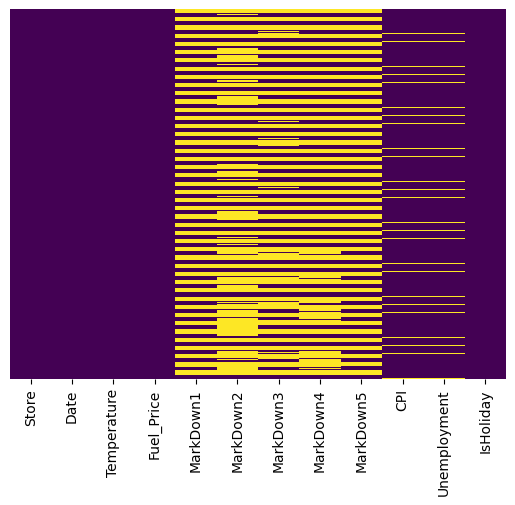

In [20]:
sns.heatmap(data_features.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.show()

<h5> Filling missing values </h5>

In [21]:
data_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = data_features[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
data_features['CPI'] = data_features['CPI'].fillna(data_features['CPI'].mean())
data_features['Unemployment'] = data_features['Unemployment'].fillna(data_features['Unemployment'].mean())

<h5> Removing nonpositive weekly sales </h5>

In [22]:
data_train.loc[data_train['Weekly_Sales']<=0]
data_train = data_train.loc[data_train['Weekly_Sales'] > 0]

<h3> Duplicated values </h3>

In [23]:
print(data_stores.duplicated().sum())
print(data_features.duplicated().sum())
print(data_train.duplicated().sum())

0
0
0


<h3> Merging data </h3>

In [24]:
merged_data= pd.merge(data_train, data_features, on=['Store', 'Date', 'IsHoliday'], how='left')
merged_data = pd.merge(merged_data, data_stores, on='Store', how='left')

merged_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


<h3> Sales distribution </h3>

In [25]:
merged_data.groupby('Type')[['Weekly_Sales','Size']].agg(['mean','count'])

Weekly_Sales                   Size        
              mean   count           mean   count
Type                                             
A     20148.108162  214961  182225.385098  214961
B     12290.549297  162787  101796.844232  162787
C      9549.454168   42464   40536.097070   42464

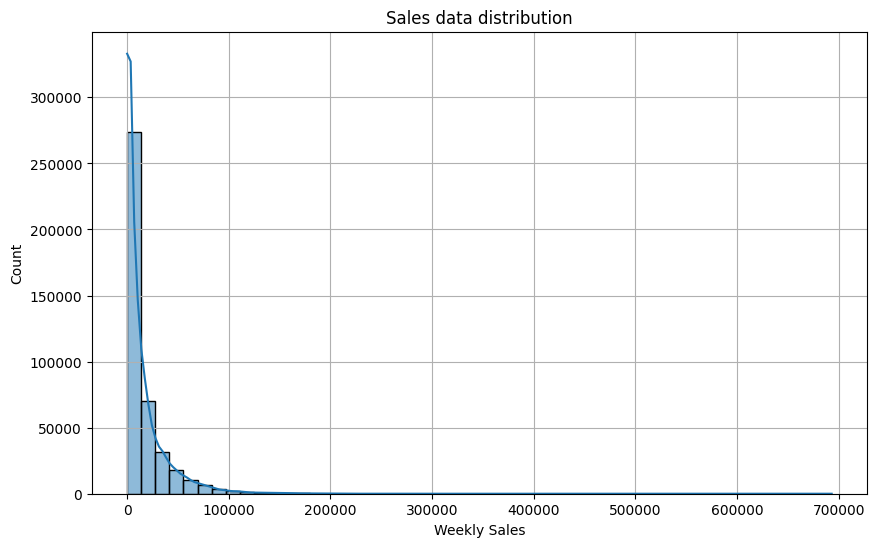

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data_train['Weekly_Sales'], bins=50, kde=True)
plt.title('Sales data distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<h3> Sales over time </h3>

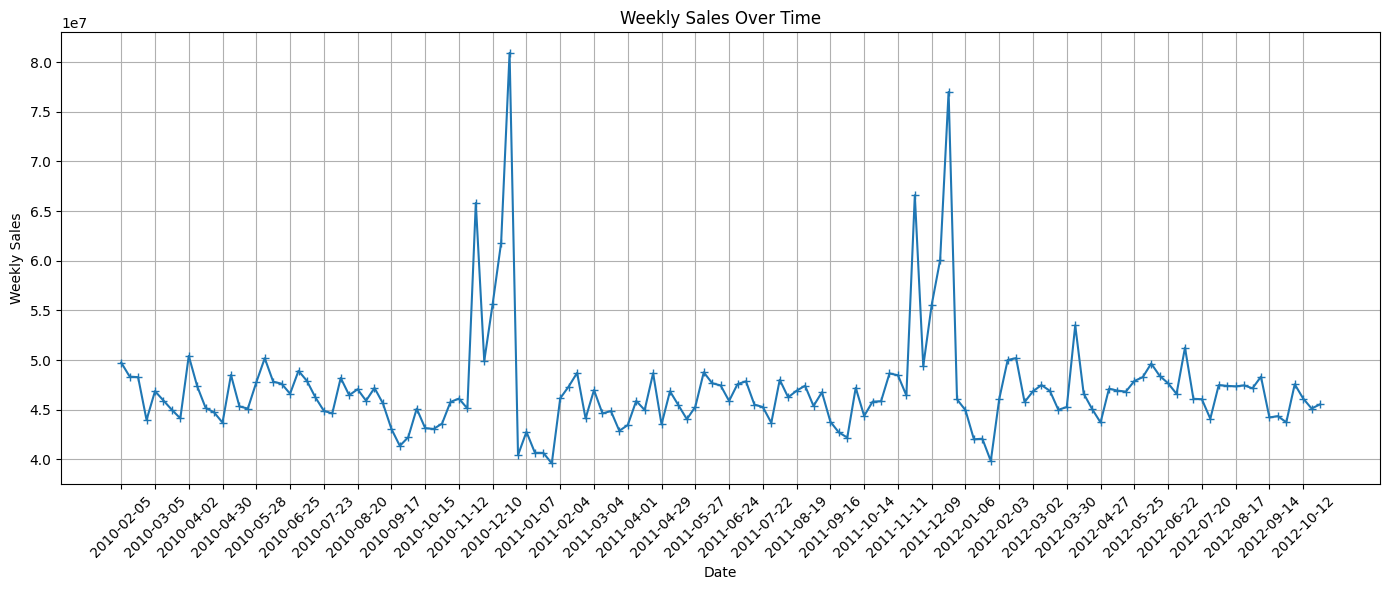

In [27]:
data_train_sorted = data_train.sort_values(by='Date')
sales_by_date = data_train_sorted.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'], marker='+', linestyle='-')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.tight_layout()
plt.show()

<h3> Seasonal decomposition of monthly data </h3>

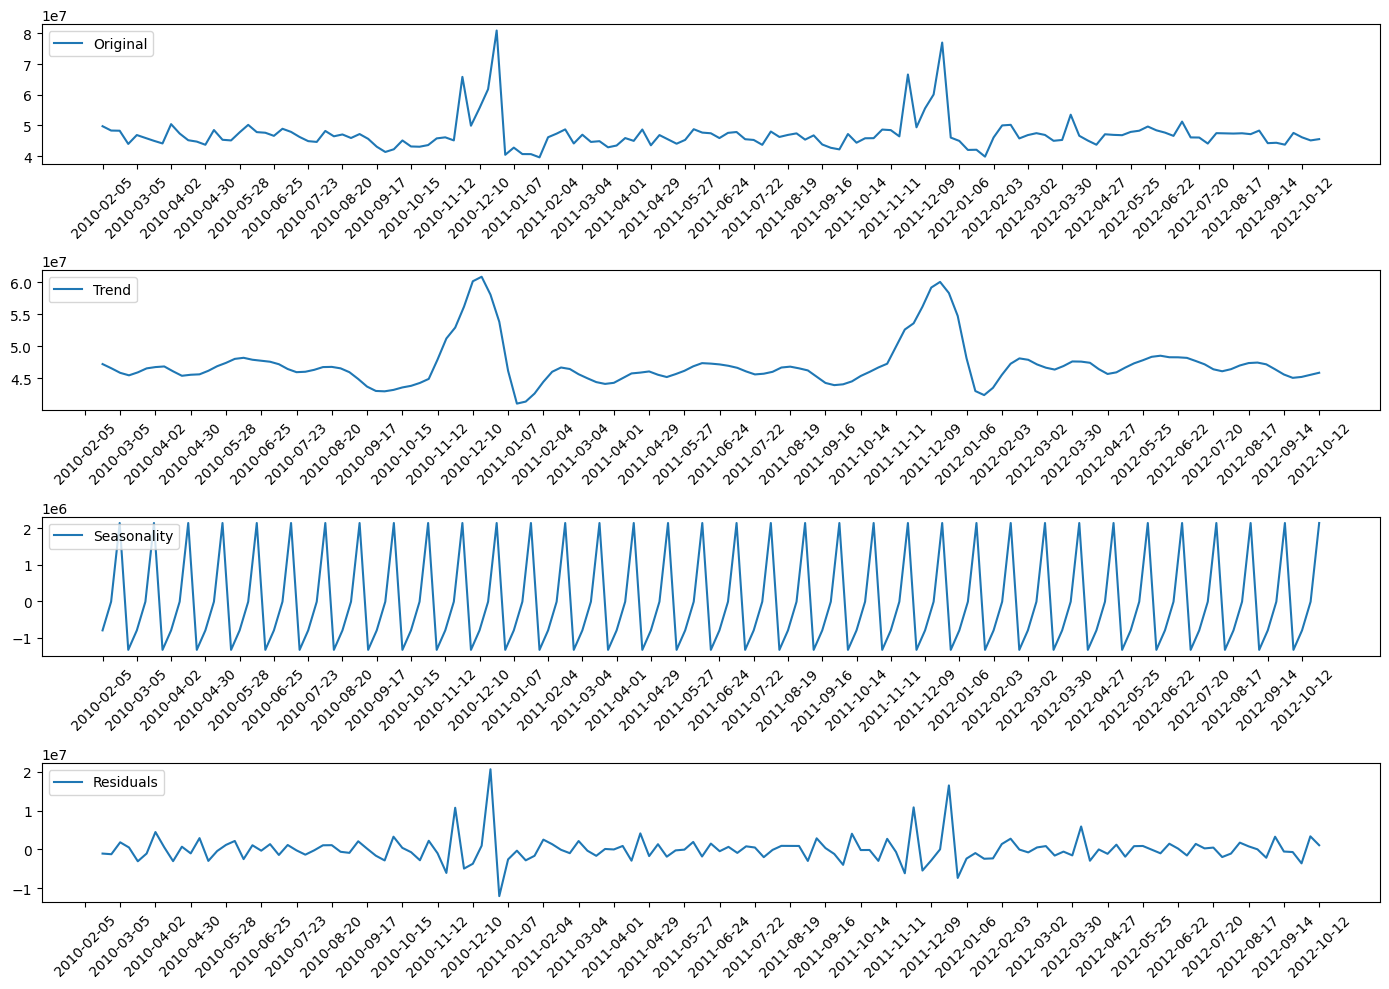

In [28]:
result = seasonal_decompose(sales_by_date['Weekly_Sales'], model='additive', period=4)

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'], label='Original')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(sales_by_date['Date'], result.trend, label='Trend')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(sales_by_date['Date'], result.seasonal, label='Seasonality')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(sales_by_date['Date'], result.resid, label='Residuals')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<h3> Seasonal decomposition of annual data </h3>

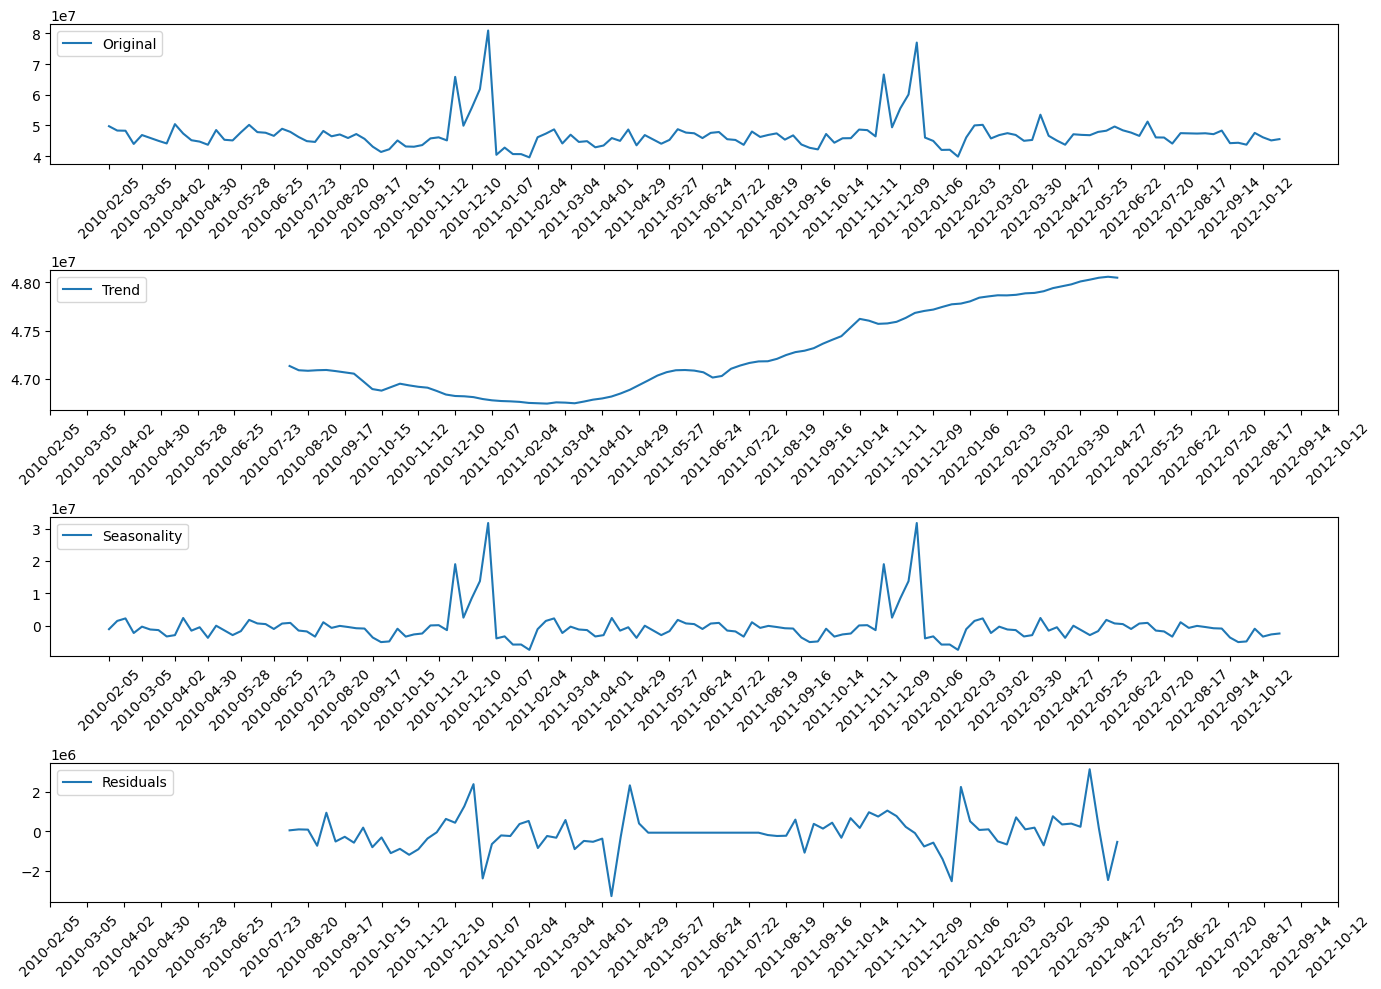

In [29]:
result = seasonal_decompose(sales_by_date['Weekly_Sales'], model='additive', period=52)

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'], label='Original')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(sales_by_date['Date'], result.trend, label='Trend')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(sales_by_date['Date'], result.seasonal, label='Seasonality')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(sales_by_date['Date'], result.resid, label='Residuals')
plt.xticks(sales_by_date['Date'][::4], rotation=45)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

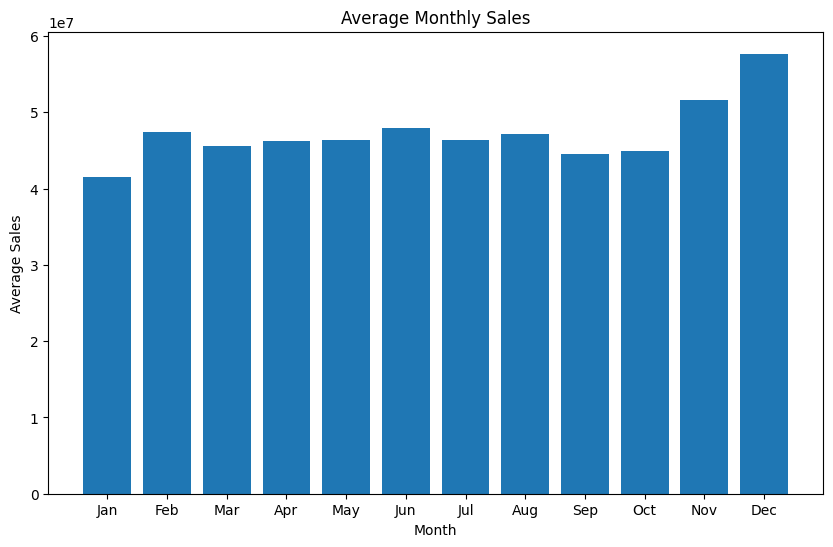

In [30]:
sales_by_date['Date'] = pd.to_datetime(sales_by_date['Date'])
sales_by_month = sales_by_date.groupby(sales_by_date['Date'].dt.month)['Weekly_Sales'].mean()

plt.figure(figsize=(10, 6))
plt.bar(sales_by_month.index, sales_by_month.values)
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<h3> Correlations heatmap </h3>

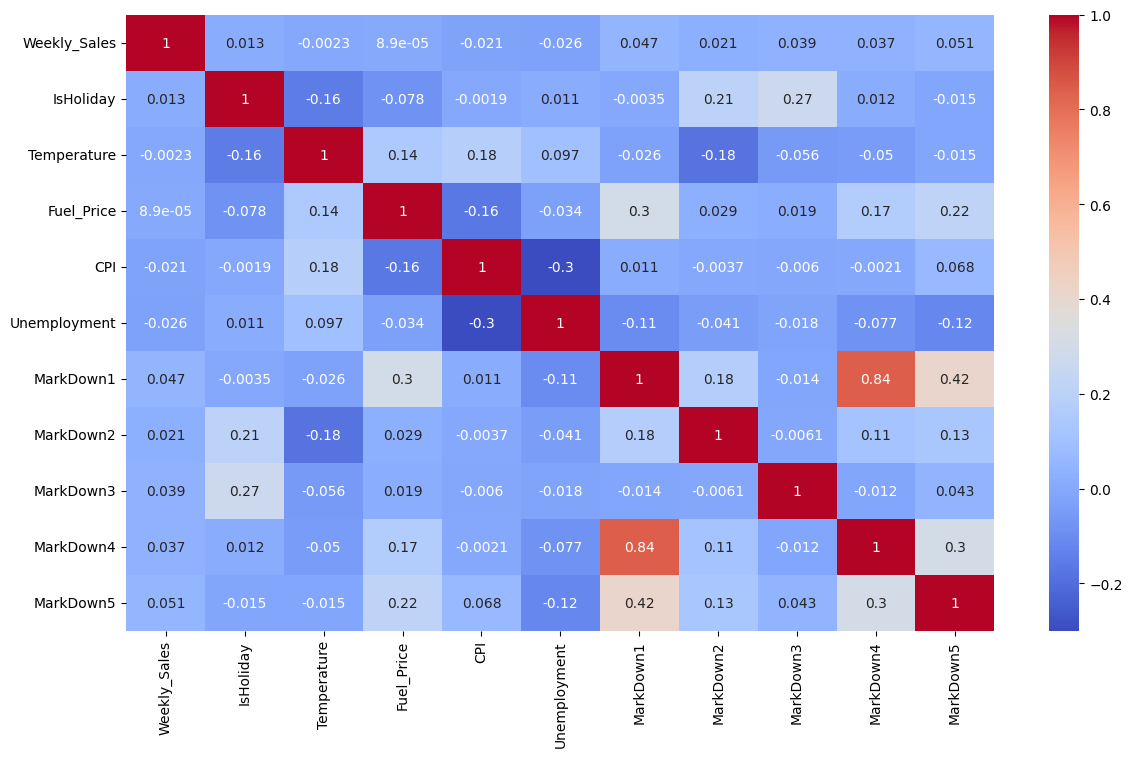

In [31]:
cor_features = merged_data[['Weekly_Sales','IsHoliday','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(cor_features, annot=True, cmap='coolwarm')
plt.show()

<h2> EDA conclusions </h2>

Negative values in weekly sales were found and were only 0.3% of the data, so they were removed.

Each markdown had more than 50% missing values, so missing values were assumed to indicate no markdown and were replaced with 0.

Some departments were missing, totaling 81 instead of the expected range of 1 to 99.

CPI and Unemployment had missing values, approximately 7.14%, so they were replaced with the average.

There is a strong correlation between markdown 3 and 2 with holidays, and a very high correlation between markdown 1 and markdown 4. Markdown 2 also shows a significant negative correlation with temperature.

Sales peak in November and December but decline in January.

<h1> Clustering </h1>

<h3> Clustering based on weekly sales variance and mean size </h3>

In [32]:
grouped_data = merged_data.groupby('Store').agg({
    'Weekly_Sales': 'var',
    'Size': 'mean'
}).reset_index()

X = grouped_data[['Weekly_Sales', 'Size']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

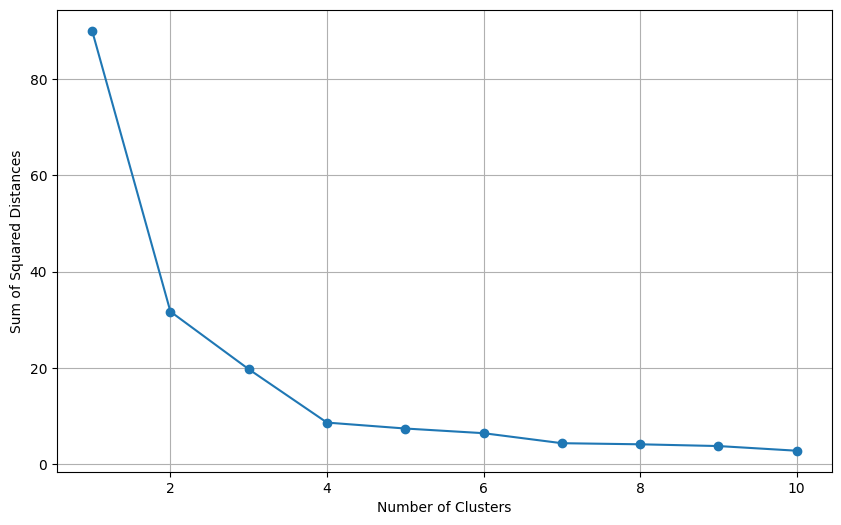

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

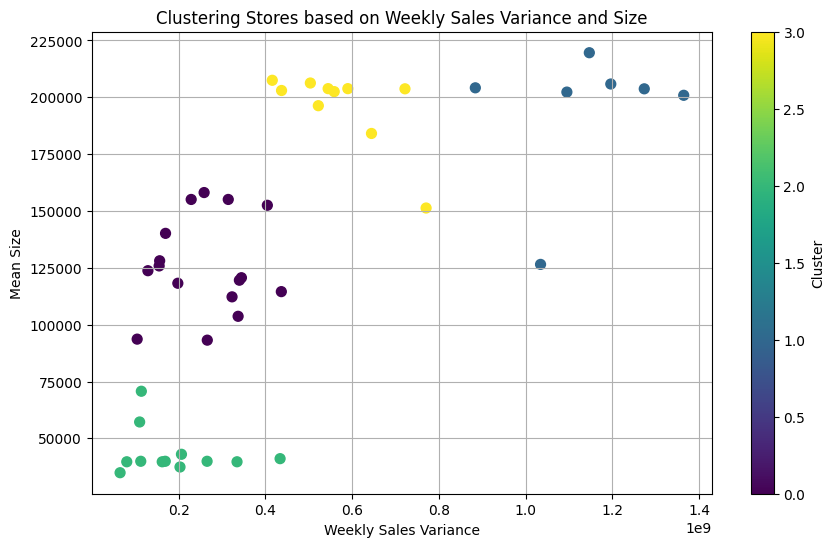

In [34]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
grouped_data['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Weekly_Sales'], grouped_data['Size'], c=grouped_data['Cluster'], s=50)
plt.title('Clustering Stores based on Weekly Sales Variance and Size')
plt.xlabel('Weekly Sales Variance')
plt.ylabel('Mean Size')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [35]:
cluster_names = {
    0: 'Medium Shops',
    1: 'Big Shops, big Variance',
    2: 'Small Shops',
    3: 'Big Shops, medium Variance'
}
grouped_data['Cluster_Name'] = grouped_data['Cluster'].map(cluster_names)

Purple Cluster (0): Medium-sized stores with moderate sales fluctuations.

Turquoise Cluster (1): Small stores with stable sales.

Yellow Cluster (2): Large stores with more significant sales fluctuations.

Blue Cluster (3): Large stores with the greatest sales fluctuations.
big shops have bigger variance 


<h2> Feature selection </h3>
For clustering two features were used:

- **Weekly Sales Variance**: serves as a significant measure of sales volatility among stores, potentially influenced by factors like location. This variation can lead to different business strategies, as it indicates stable shopping patterns among local customers versus diverse customer bases, including holiday shoppers.

- **Size**: Store size impacts its capacity to handle various sales volumes and influences assortment management and promotional strategies.

<h2> Clustering method </h2>

The KMeans clustering method was utilized to minimize the sum of squared distances between points within clusters and their centroids. The optimal number of clusters (4 in this case) was determined using the 'elbow method,' which identifies the point where adding more clusters does not significantly reduce the sum of squared distances.

<h2> Cluster interpretation </h2>

 - **Cluster 0 ("Medium Shops") and 2 ("Small Shops"):** These clusters represent medium and small-sized stores, differing mainly in size and demonstrating more stable sales patterns.

 - **Cluster 1 ("Big Shops, big Variance") and 3 ("Big Shops, medium Variance"):** These clusters comprise large stores that differ in sales volatility. The variance suggests potential differences in location dynamics, possibly attracting varied customer bases

<h1> Cluster analysis </h1>

<h3> Weekly sales across clusters </h3>

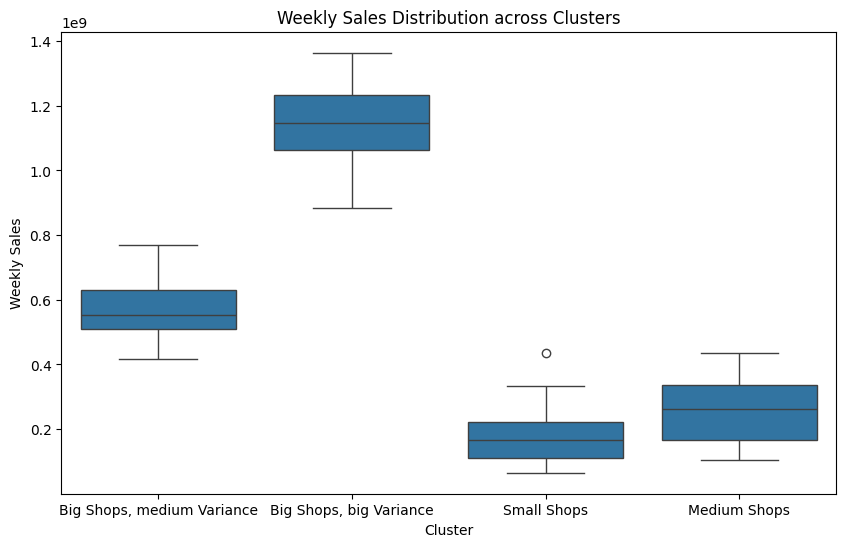

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_Name', y='Weekly_Sales', data=grouped_data)
plt.title('Weekly Sales Distribution across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Weekly Sales')
plt.show()

<h3> Small shops weekly sales </h3>

In [37]:
small_shops_data = grouped_data[grouped_data['Cluster_Name'] == 'Small Shops']
small_shops_data_agg = small_shops_data.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Size': 'first'
}).reset_index()
small_shops_data_agg.sort_values(by='Weekly_Sales', ascending=False)

,Store,Weekly_Sales,Size
10,43,4.339907e+08,41062.0
9,42,3.347088e+08,39690.0
7,37,2.657199e+08,39910.0
4,30,2.066413e+08,42988.0
0,3,2.032702e+08,37392.0
6,36,1.692709e+08,39910.0
8,38,1.622963e+08,39690.0
2,7,1.141475e+08,70713.0
11,44,1.128470e+08,39910.0
3,16,1.102653e+08,57197.0


<h3> Comparing shops inside clusters </h3>

In [38]:
def analyze_and_visualize_cluster(cluster_data):
    merged_data.dropna(subset=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], how='all', inplace=True)
    
    cluster_data = cluster_data['Store'].tolist()
    cluster_data = merged_data[merged_data['Store'].isin(cluster_data)]
    shop_comparison = cluster_data.groupby('Store').agg({
        'Weekly_Sales': 'mean',
        'Temperature': 'mean',
        'Fuel_Price': 'mean',
        'MarkDown1': 'mean',
        'MarkDown2': 'mean',
        'MarkDown3': 'mean',
        'MarkDown4': 'mean',
        'MarkDown5': 'mean',
        'CPI': 'mean',
        'Unemployment': 'mean',
        'Size': 'mean'
    }).reset_index()
      
    shop_comparison = shop_comparison.sort_values(by='Weekly_Sales', ascending=False)
    
    stores = shop_comparison['Store']
    mean_sales = shop_comparison['Weekly_Sales']
    mean_fuel_price = shop_comparison['Fuel_Price']
    mean_cpi = shop_comparison['CPI']
    mean_unemployment = shop_comparison['Unemployment']
    mean_size = shop_comparison['Size']
    mean_markdown1 = shop_comparison['MarkDown1']
    mean_markdown2 = shop_comparison['MarkDown2']
    mean_markdown3 = shop_comparison['MarkDown3']
    mean_markdown4 = shop_comparison['MarkDown4']
    mean_markdown5 = shop_comparison['MarkDown5']
    
    plt.figure(figsize=(20, 12))
    #Mean Weekly Sales
    plt.subplot(251)
    plt.bar(np.arange(len(stores)), mean_sales, color='skyblue')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean Weekly Sales')
    plt.xlabel('Store')
    plt.ylabel('Mean Weekly Sales')
    plt.grid(True)

    #Mean Fuel Price
    plt.subplot(252)
    plt.bar(np.arange(len(stores)), mean_fuel_price, color='blue')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean Fuel Price')
    plt.xlabel('Store')
    plt.ylabel('Mean Fuel Price')
    plt.grid(True)

    #Mean CPI
    plt.subplot(253)
    plt.bar(np.arange(len(stores)), mean_cpi, color='green')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean CPI')
    plt.xlabel('Store')
    plt.ylabel('Mean CPI')
    plt.grid(True)

    #Mean Unemployment
    plt.subplot(254)
    plt.bar(np.arange(len(stores)), mean_unemployment, color='orange')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean Unemployment')
    plt.xlabel('Store')
    plt.ylabel('Mean Unemployment')
    plt.grid(True)

    #Mean Size
    plt.subplot(255)
    plt.bar(np.arange(len(stores)), mean_size, color='red')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean Size')
    plt.xlabel('Store')
    plt.ylabel('Mean Size')
    plt.grid(True)

    #Mean MarkDown1
    plt.subplot(256)
    plt.bar(np.arange(len(stores)), mean_markdown1, color='purple')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean MarkDown1')
    plt.xlabel('Store')
    plt.ylabel('Mean MarkDown1')
    plt.grid(True)

    #Mean MarkDown2
    plt.subplot(257)
    plt.bar(np.arange(len(stores)), mean_markdown2, color='brown')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean MarkDown2')
    plt.xlabel('Store')
    plt.ylabel('Mean MarkDown2')
    plt.grid(True)

    #Mean MarkDown3
    plt.subplot(258)
    plt.bar(np.arange(len(stores)), mean_markdown3, color='pink')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean MarkDown3')
    plt.xlabel('Store')
    plt.ylabel('Mean MarkDown3')
    plt.grid(True)

    #Mean MarkDown4
    plt.subplot(259)
    plt.bar(np.arange(len(stores)), mean_markdown4, color='yellow')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean MarkDown4')
    plt.xlabel('Store')
    plt.ylabel('Mean MarkDown4')
    plt.grid(True)

    #Mean MarkDown5
    plt.subplot(2, 5, 10)
    plt.bar(np.arange(len(stores)), mean_markdown5, color='cyan')
    plt.xticks(np.arange(len(stores)), stores)
    plt.title('Mean MarkDown5')
    plt.xlabel('Store')
    plt.ylabel('Mean MarkDown5')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    X = cluster_data[['Fuel_Price', 'CPI', 'Unemployment', 
                      'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown5']]
    X = X.fillna(X.mean())
    X = sm.add_constant(X)
    y = cluster_data['Weekly_Sales']

    model = sm.OLS(y, X).fit()
    print(model.summary())
    remaining_predictors = ['Fuel_Price', 'CPI', 'Unemployment', 'Size', 
                        'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown5']
    corr_matrix = cluster_data[remaining_predictors].corr()
    
    #correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Predictors')
    plt.show()



Small shops:



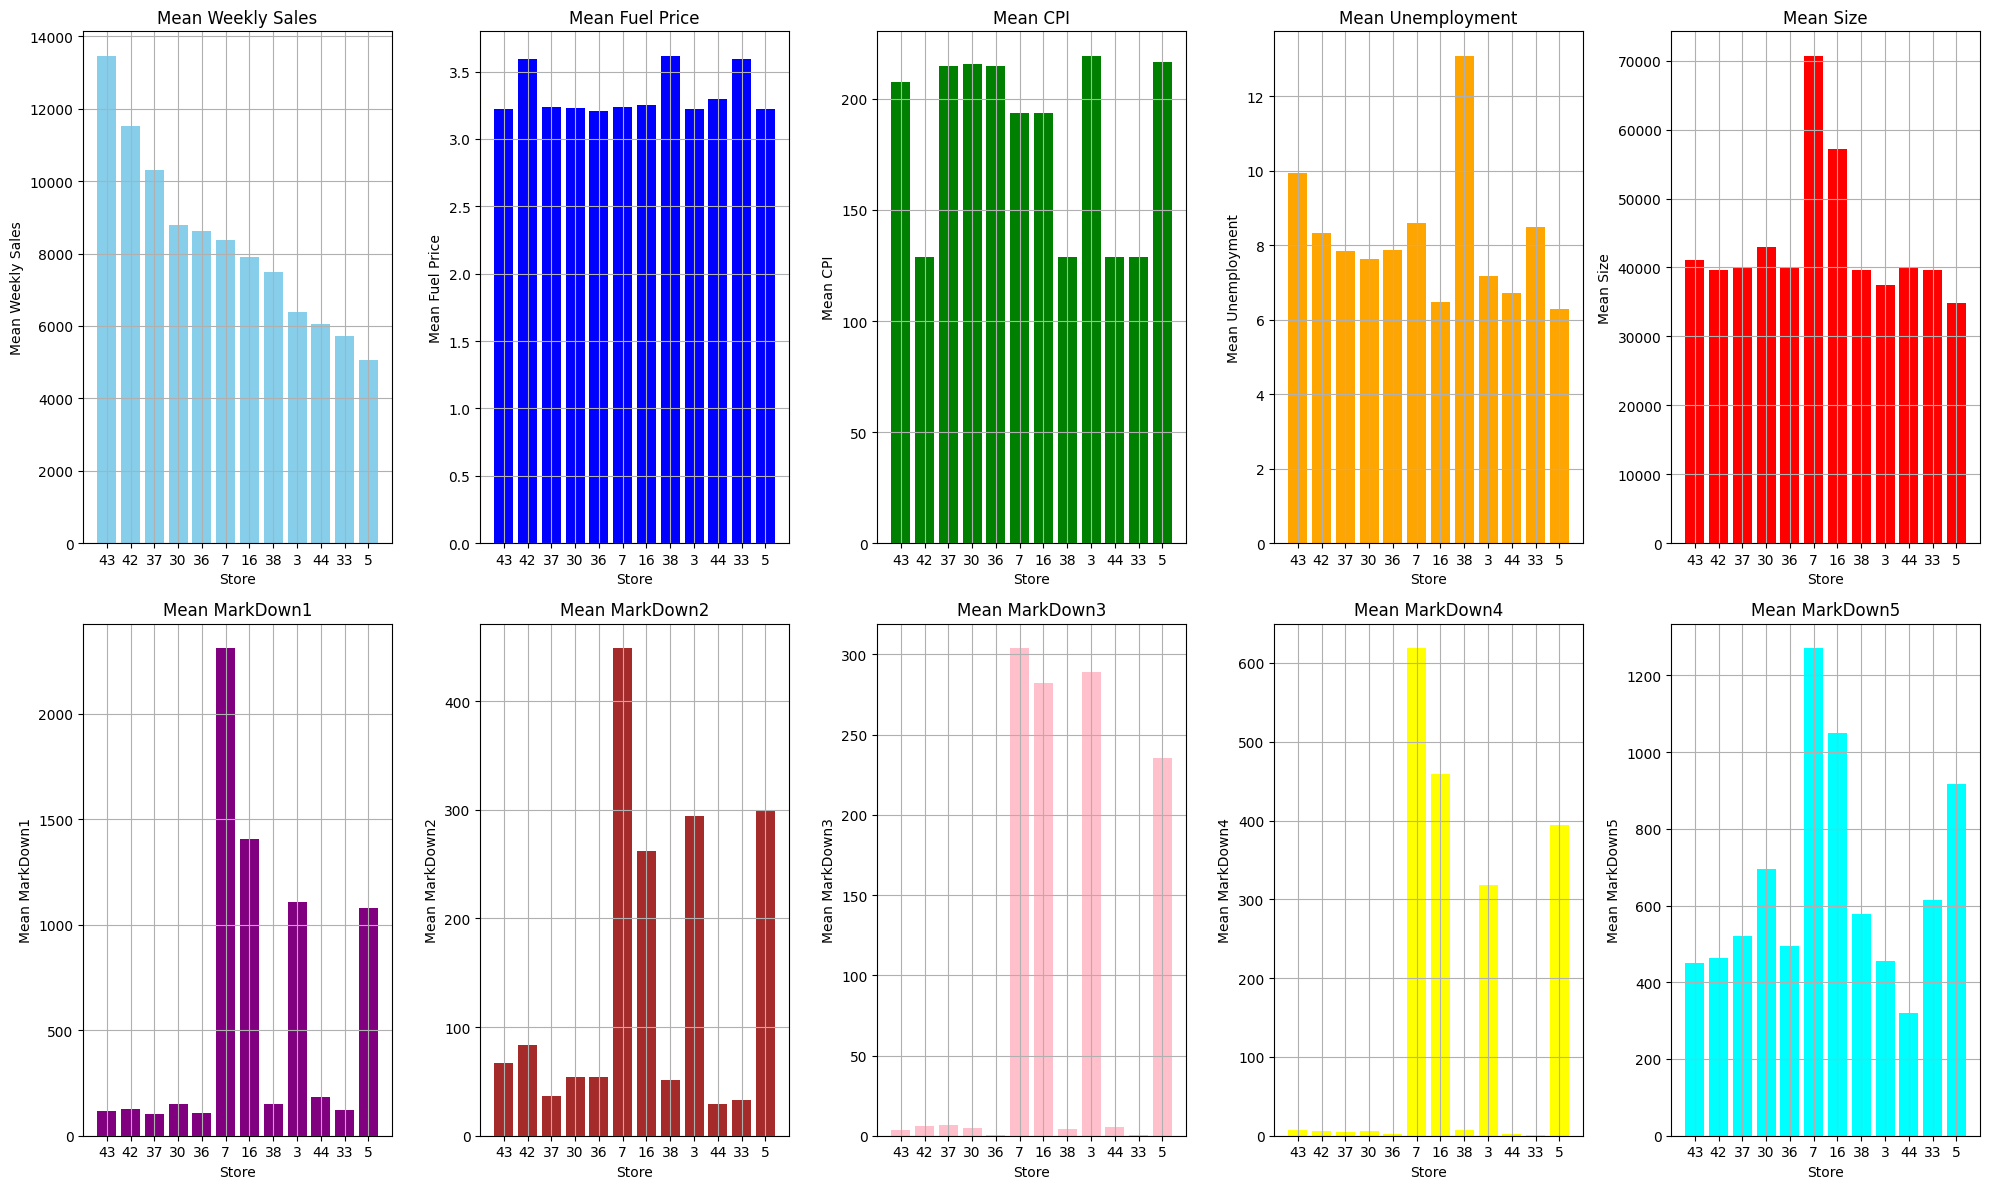

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     60.39
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           5.01e-87
Time:                        16:50:26   Log-Likelihood:            -1.0096e+06
No. Observations:               92284   AIC:                         2.019e+06
Df Residuals:                   92276   BIC:                         2.019e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          401.7553    577.774      0.695   

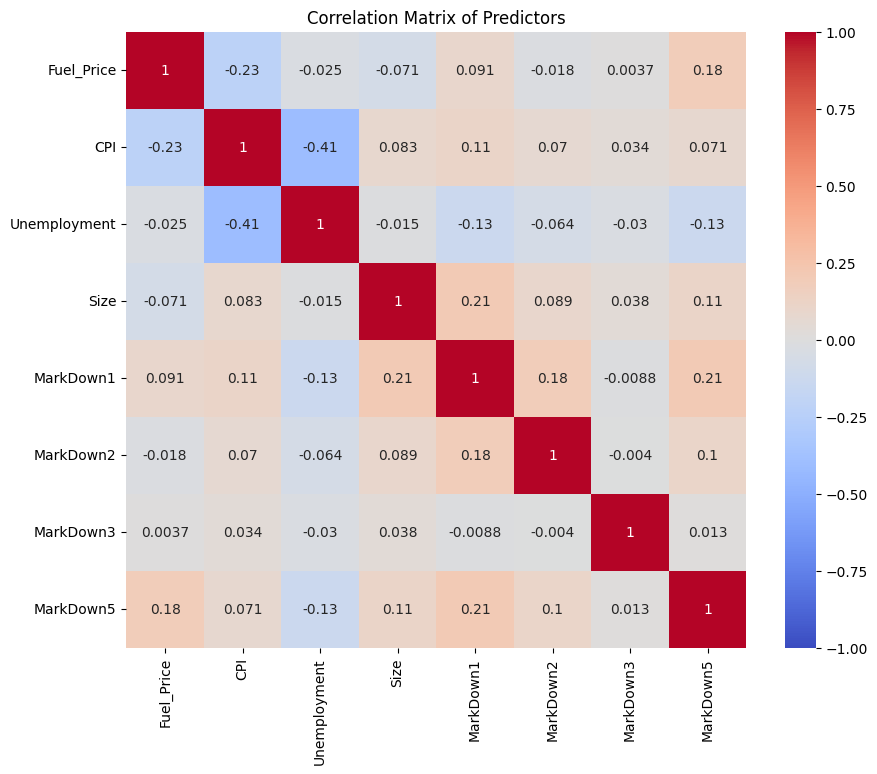


Medium shops:



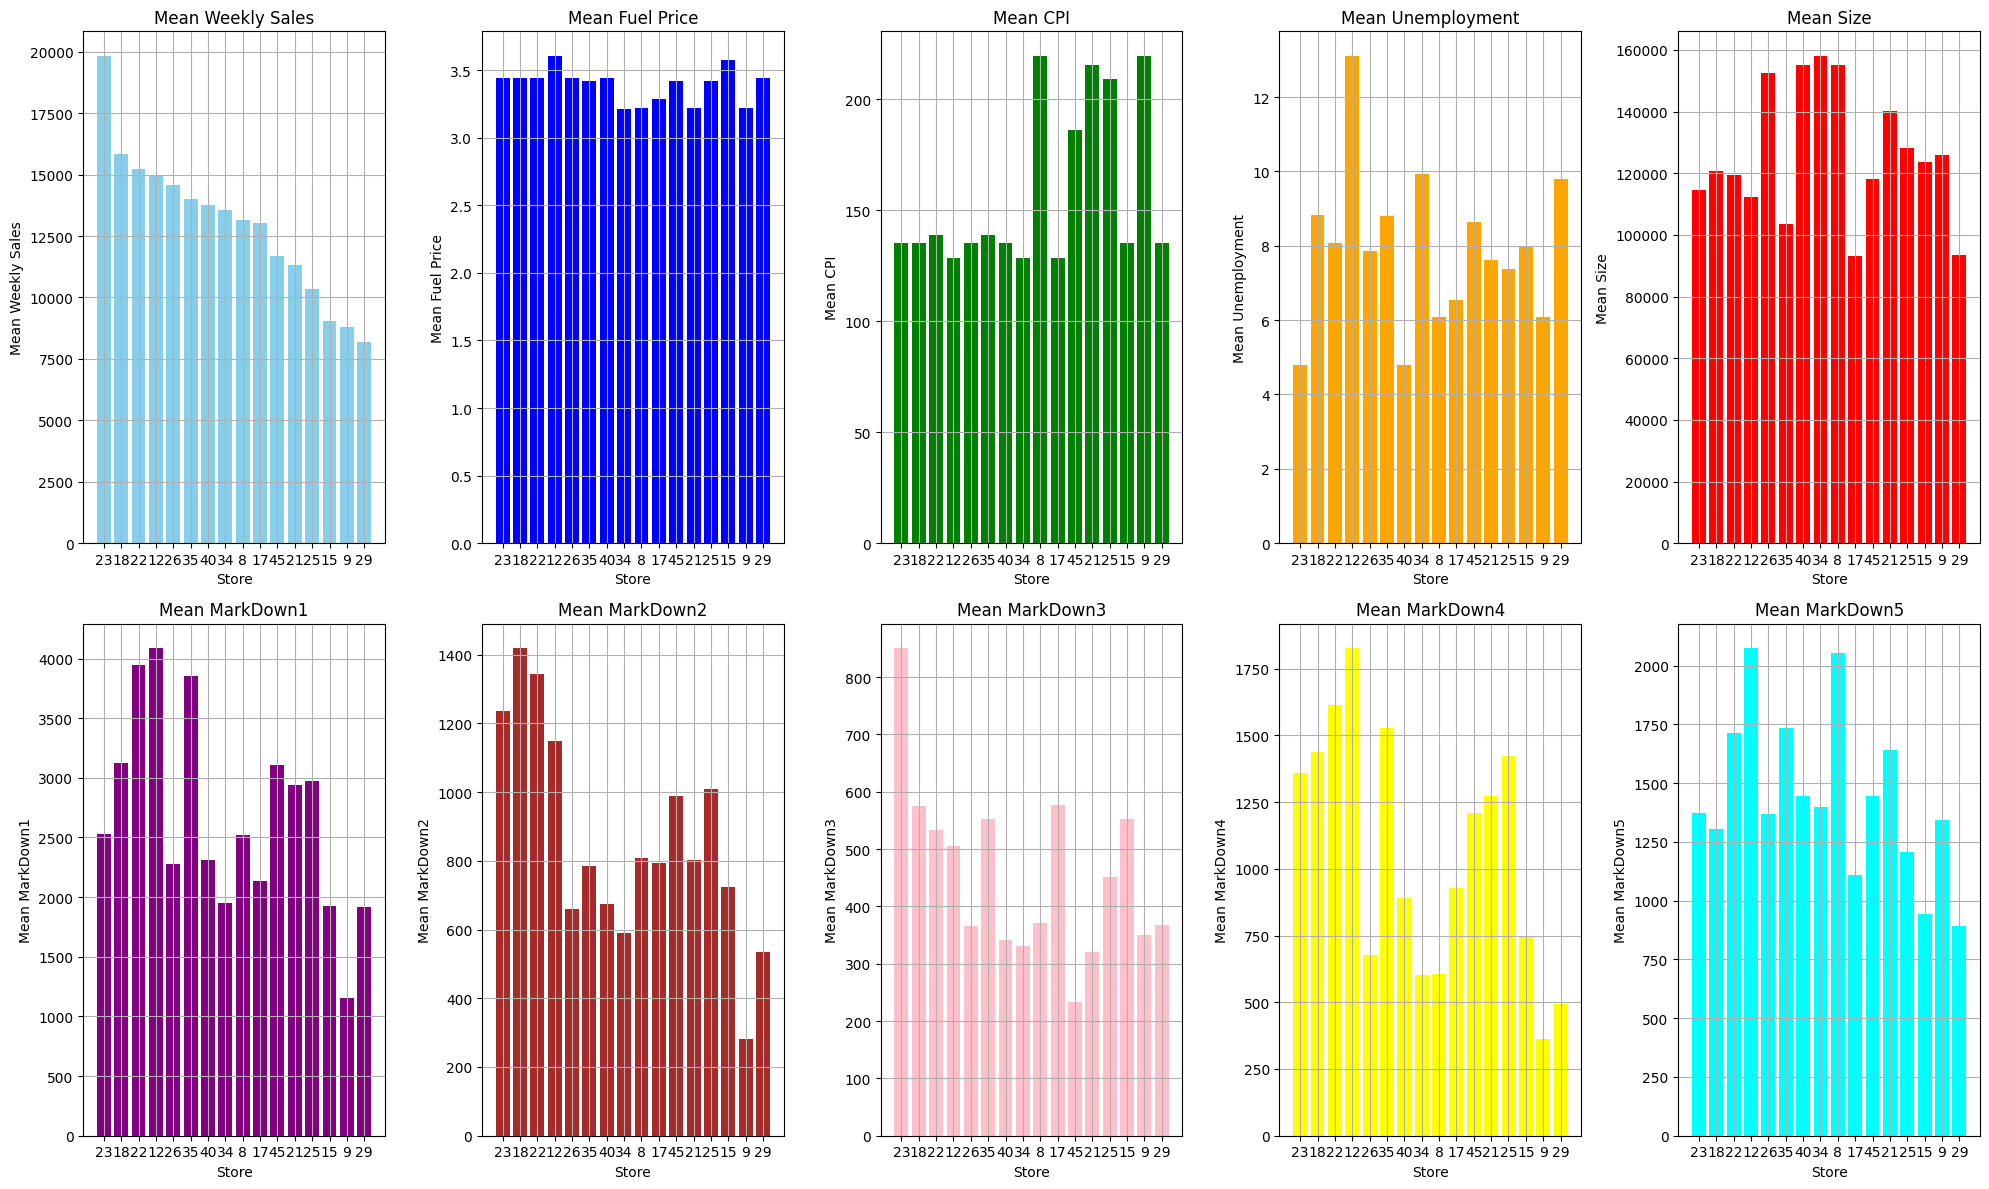

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     213.3
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          9.47e-317
Time:                        16:50:29   Log-Likelihood:            -1.7274e+06
No. Observations:              155318   AIC:                         3.455e+06
Df Residuals:                  155310   BIC:                         3.455e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          2.48e+04    460.649     53.828   

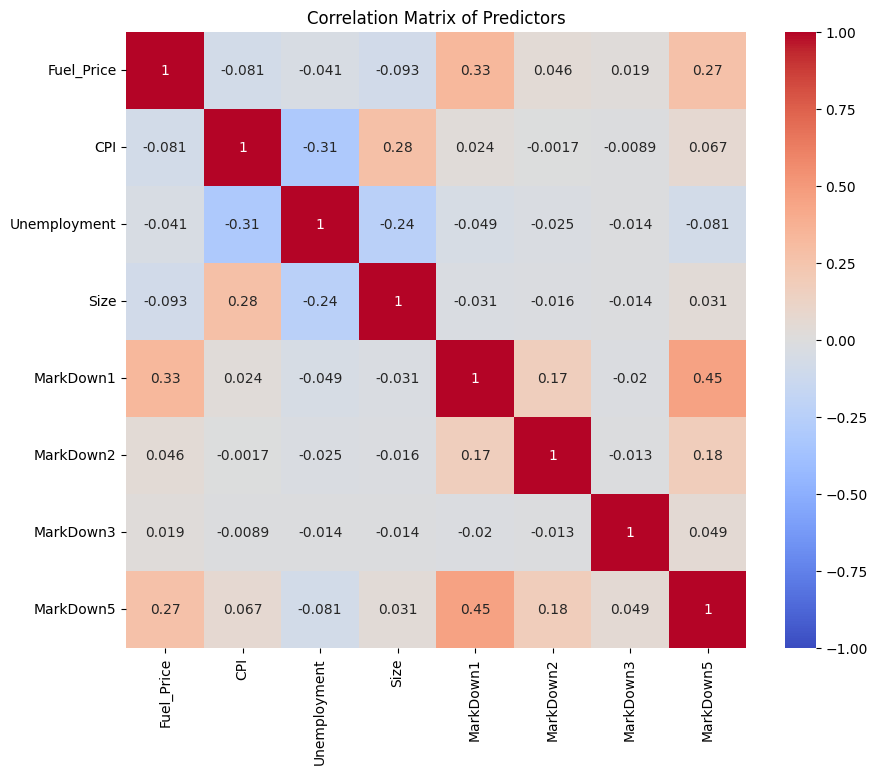


Big Shops with big Variance:



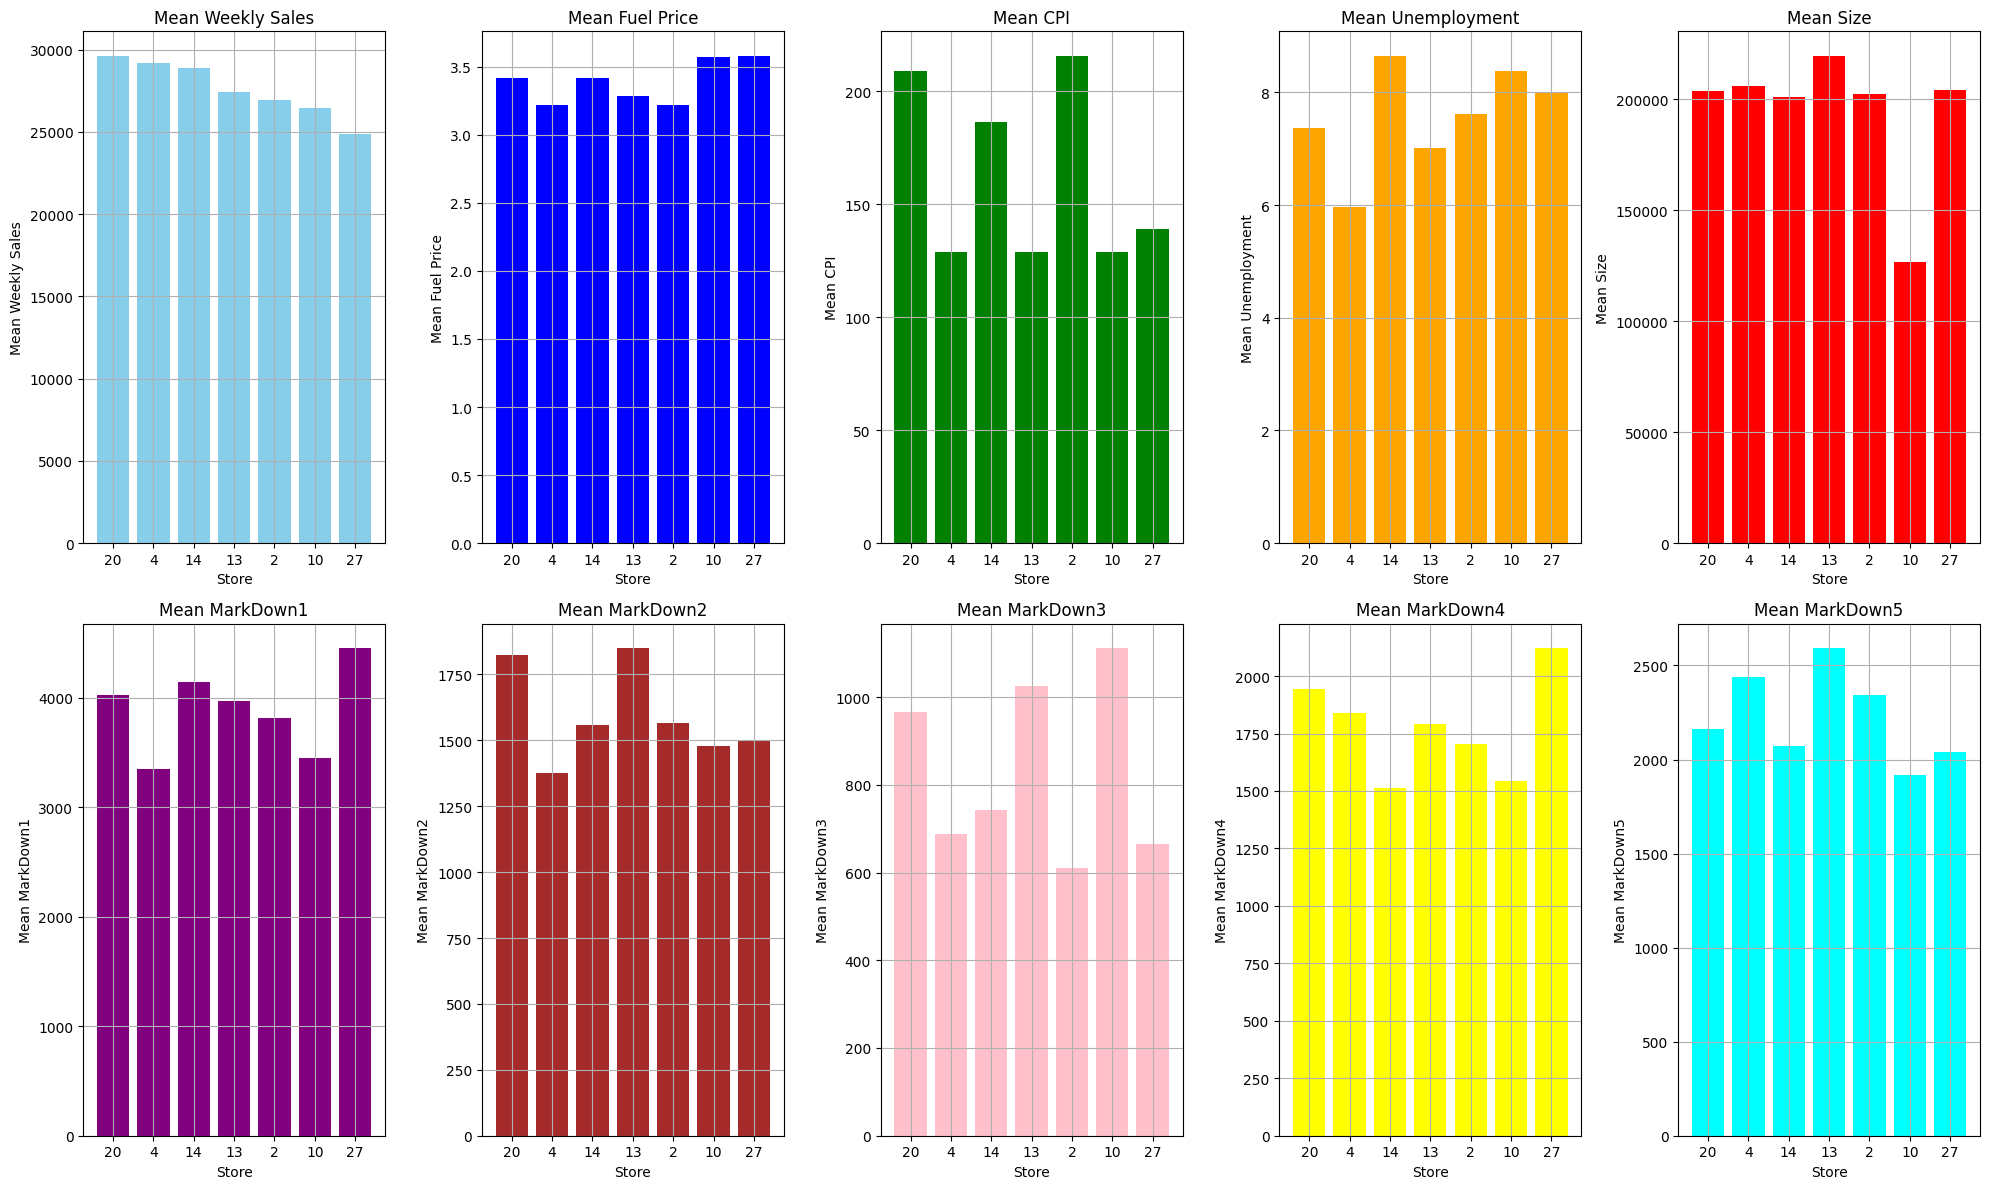

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     22.76
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           4.81e-31
Time:                        16:50:32   Log-Likelihood:            -8.4788e+05
No. Observations:               71572   AIC:                         1.696e+06
Df Residuals:                   71564   BIC:                         1.696e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.713e+04   1503.230     24.702   

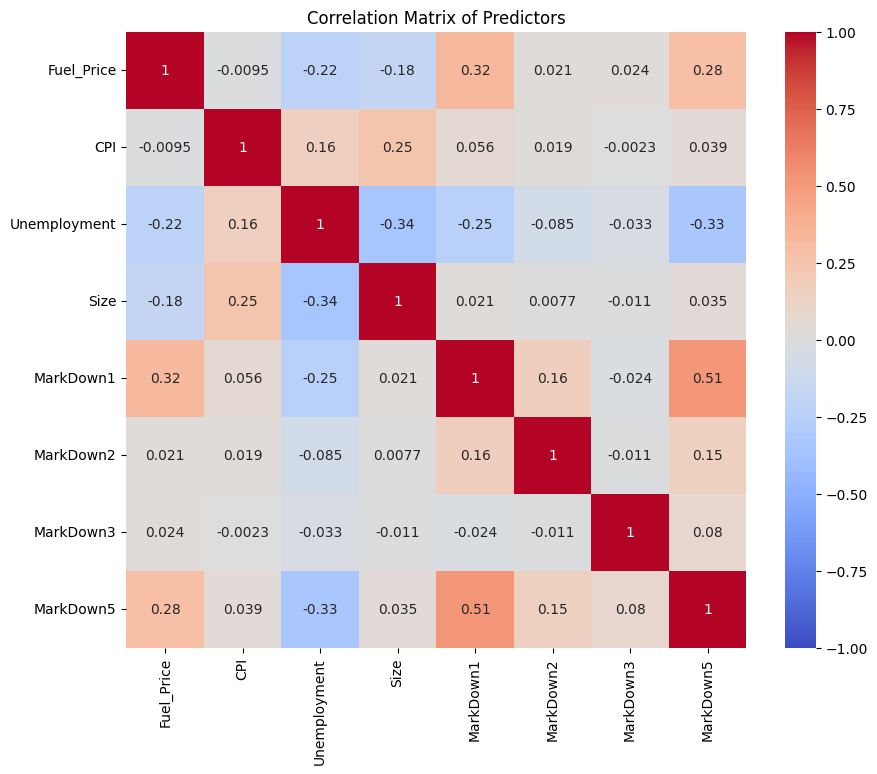


Big Shops with medium Variance:



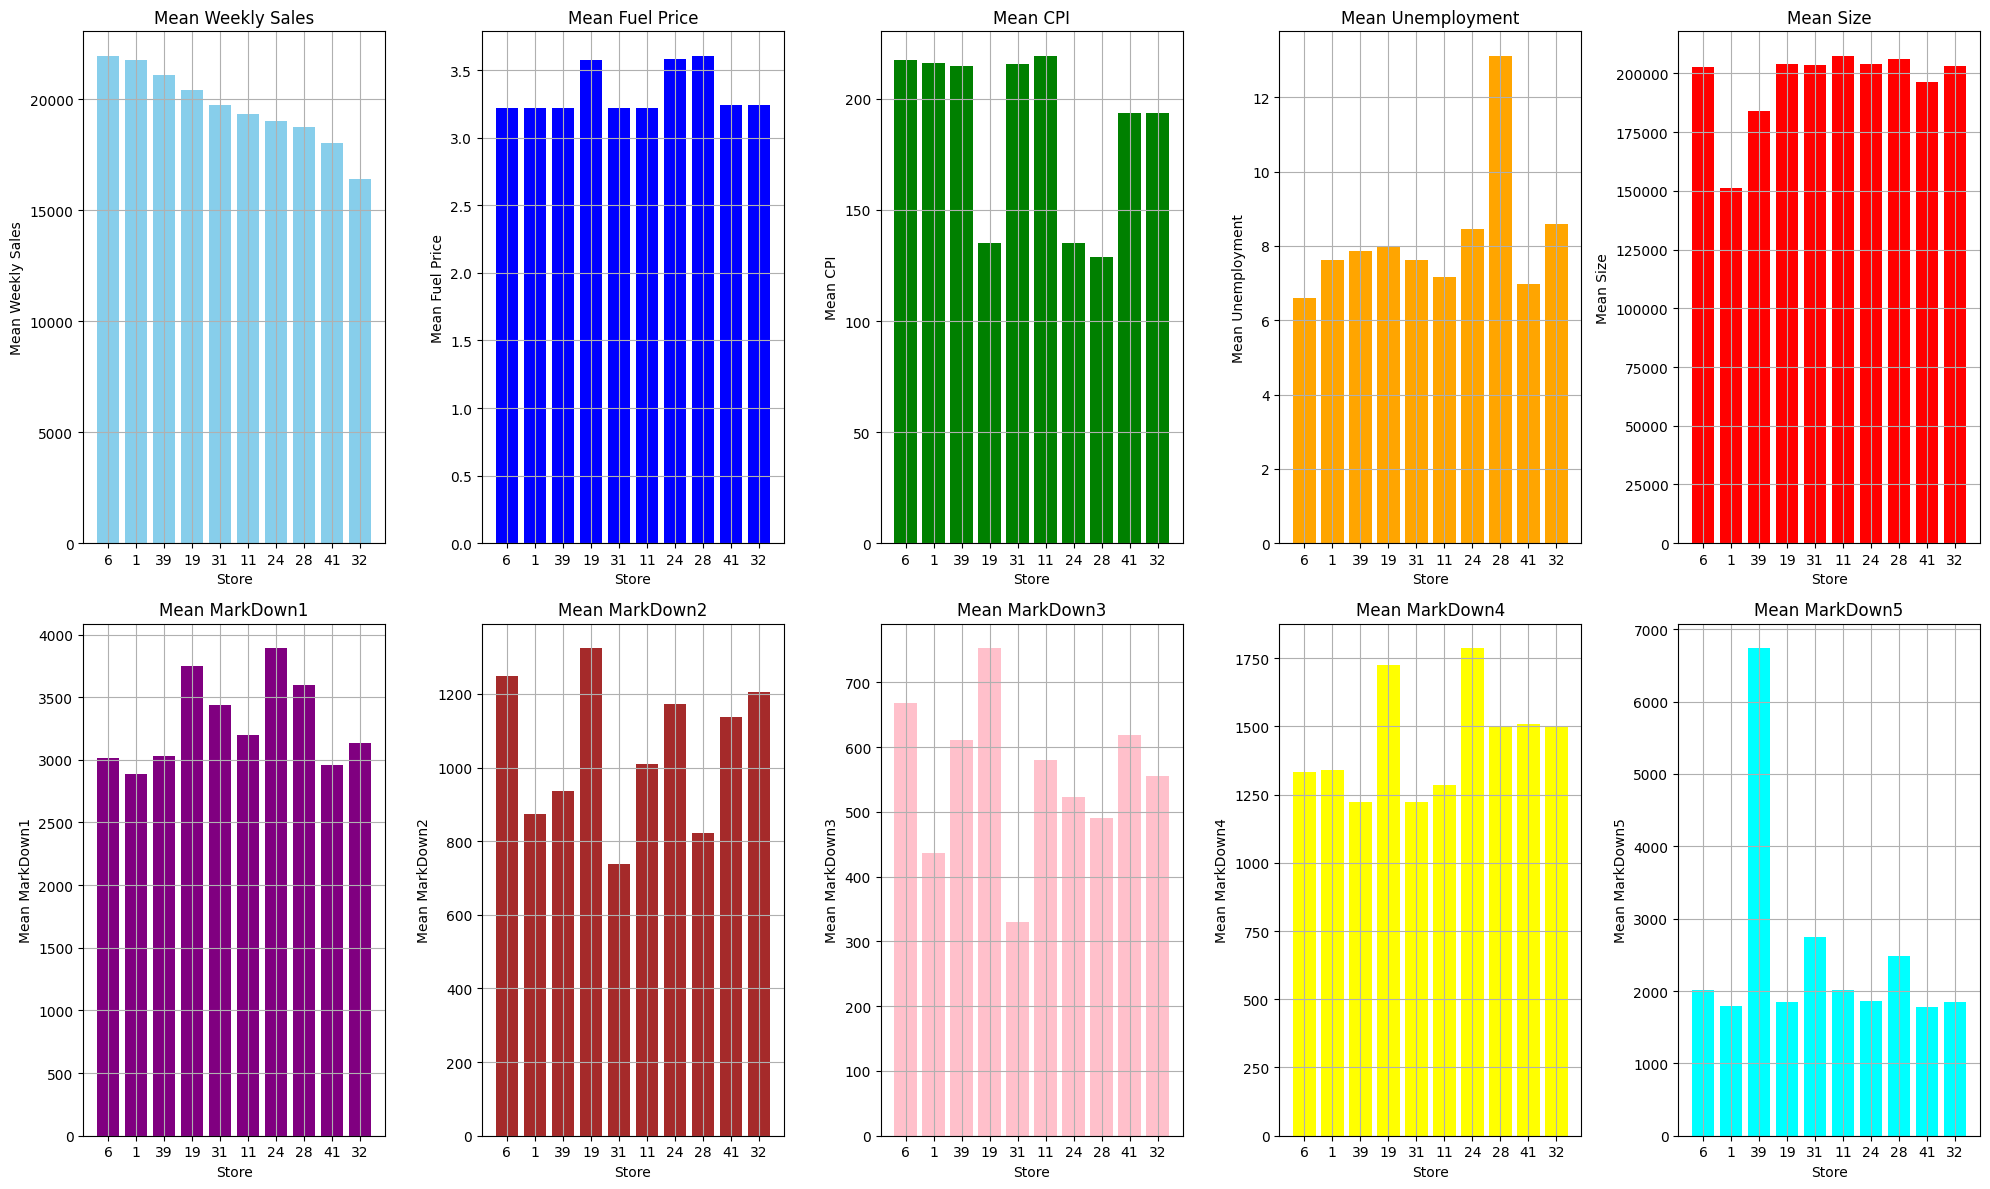

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.12
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           4.08e-30
Time:                        16:50:34   Log-Likelihood:            -1.1621e+06
No. Observations:              101038   AIC:                         2.324e+06
Df Residuals:                  101030   BIC:                         2.324e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.974e+04   1184.134     16.674   

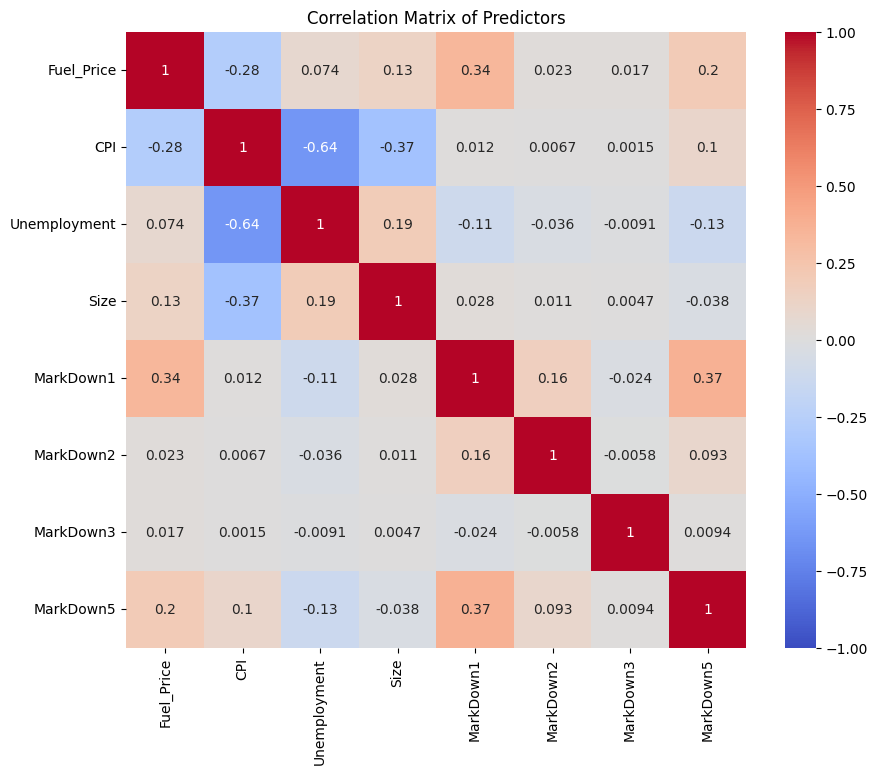

In [39]:
print("\nSmall shops:\n")
cluster1_data = grouped_data[grouped_data['Cluster_Name'] == 'Small Shops']
analyze_and_visualize_cluster(cluster1_data)

print("\nMedium shops:\n")
cluster2_data = grouped_data[grouped_data['Cluster_Name'] == 'Medium Shops']
analyze_and_visualize_cluster(cluster2_data)

print("\nBig Shops with big Variance:\n")
cluster3_data = grouped_data[grouped_data['Cluster_Name'] == 'Big Shops, big Variance']
analyze_and_visualize_cluster(cluster3_data)

print("\nBig Shops with medium Variance:\n")
cluster4_data = grouped_data[grouped_data['Cluster_Name'] == 'Big Shops, medium Variance']
analyze_and_visualize_cluster(cluster4_data)

<h1> Cluster anlaysis conclusions </h1>

Based on the current data, it is not possible to present interesting conclusions. The regression model used explains at most 1% of the variance (R-squared = 0.010) and exhibits strong multicollinearity among some variables. This significantly limits the ability to accurately determine the factors impacting store profitability.

To obtain more meaningful insights, the following data could be helpful:

 - **Customer demographics:** Information on income, age, education, and shopping preferences of customers
 - **Location data:** Geographic locations of stores, including information about local competition
 - **Promotions details:** Detailed information about promotions, discounts, and marketing campaigns conducted by stores

There is one small store whose average sales significantly deviate from others in its cluster. However, it does not differ significantly in any of the provided features from the other stores.